In [6]:
import pandas as pd
from PIL import Image

# **Alzheimer's Disease Dataset**

## Data Source(แหล่งที่มา)
- จากข้อมูลของกลุ่มพวกเราเรื่อง Alzheimer's Disease ได้คาดการณ์ว่า เป็นแหล่งข้อมูลประเภท Internal Databases<br>
      ซึ่งเป็นการเก็บข้อมูลจากผู้ป่วย จากสถานพยาบาล หรือ โรงพยาบาลแห่งหนึ่ง เนื่องจากผู้เผยแพร่ข้อมูล (dataset creator)<br> ได้ระบุไว้ว่าไม่สามารถเผยแพร่แหล่งที่มาของข้อมูลได้ในขณะนี้ และจะเผยแพร่โดยเร็วเมื่อสามารถทำได้ (ใน comment ตอบกลับ user)

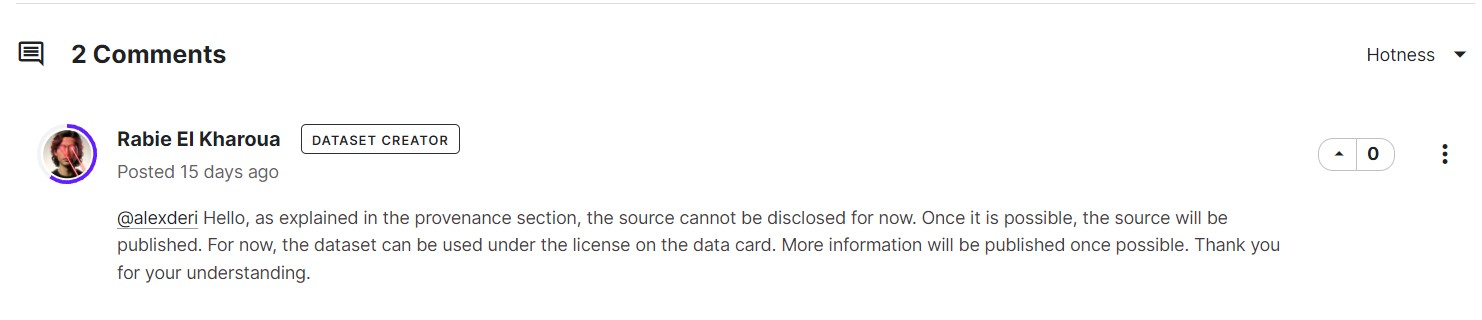

## Data Formats (รูปแบบการจัดเก็บ)

- รูปแบบการเก็บจะเป็นรูปแบบ CSV ซึ่งเป็น Text 
- มีโครงสร้างรูปแบบ Unstructured Data 

## จำนวนข้อมูล
- จำนวนตัวอย่าง dataset ชุดนี้นำมาจากผู้ป่วยที่มี IDs จาก 4751 ถึง 6900 นับเป็นจำนวนตัวอย่างทั้งหมด 2149 คน

In [7]:
df = pd.read_csv("Alzheimer's_Disease_Dataset/alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## สิ่งที่ต้องการทำนาย 

- สิ่งที่ต้องการจะทำนายจากชุดข้อมูลก็คือ โอกาสการเกิดโรคอัลไซเมอร์ ของแต่ละบุคคลตามปัจจัยต่างๆ เช่น การใช้ชีวิต, ประวัติการแพทย์,  

## สิ่งที่ใช้ในการทำนาย
 
 1. Demographic Details-รายละเอียดประชากร

    1. Age(อายุ): อายุของผู้ป่วยอยู่ในช่วง 60 - 90 ปี

    2. Gender(เพศ) : 0 หมายถึง ผู้ชาย ส่วน 1 หมายถึง ผู้หญิง
    
    3. Ethnicity(เชื้อชาติ) :
        0: คนผิวขาว
        1: คนอเมริกันเชื้อสายแอฟริกัน
        2: คนเอเชีย
        3: อื่นๆ

    4. EducationLevel(ระดับการศึกษา) :
        0: ไม่มีการศึกษา
        1: มัธยมปลาย
        2: ปริญญาตรี
        3: สูงกว่าปริญญาตรี
    
2. Lifestyle Factors-ปัจจัยด้านการใช้ชีวิต

    1. BMI(ดัชนีมวลกาย) : ดัชนีมวลของผู้ป่วยแต่ละคนช่วง 15 - 40

    2. Smoking(การสูบบุหรี่) : บ่งบอกถึงการสูบบุหรี่ 0 หมายถึง ไม่สูบ และ 1 หมายถึง สูบ

    3. AlcoholConsumption(การบริโภคแอลกอฮอล์) : ความถี่ของการบริโภคแอลกอฮอล์ต่อหนึ่งสัปดาห์ ช่วง 0 - 20 หน่วย

    4. PhysicalActivity(กิจกรรมทางด้านร่างกาย) : ชั่วโมงกิจกรรมกายภาพต่อหนึ่งสัปดาห์ ช่วง 0 - 10 ชั่วโมง

    5. DietQuality(คุณภาพการบริโภค) : คะแนนคุณภาพการบริโภค ช่วง 0 - 10 คะแนน

    6. SleepQuality(คุณภาพการนอนหลับ) : คะแนนคุณภาพการนอนหลับ ช่วง 4 - 10 คะแนน

 3. Medical History-ประวัติทางการแพทย์

    1. FamilyHistoryAlzheimers(ประวัติครอบครัวที่เป็นอัลไซเมอร์) : ประวัติถึงคนในครอบครัวเป็นโรคอัลไซเมอร์ โดยที่ 0 หมายถึง ไม่เป็น และ 1 หมายถึง เป็น

    2. CardiovascularDisease(โรคหัวใจและหลอดเลือด) : ผู้ป่วยเป็นโรคหัวใจและหลอดเลือดหรือไม่ โดยที่ 0 หมายถึง ไม่เป็น และ 1 หมายถึง เป็น

    3. Diabetes(โรคเบาหวาน) : ผู้ป่วยเป็นโรคเบาหวานหรือไม่ โดยที่ 0 หมายถึง ไม่เป็น และ 1 หมายถึง เป็น

    4. Depression(โรคซึมเศร้า) : ผู้ป่วยเป็นโรคซึมเศร้าหรือไม่ โดยที่ 0 หมายถึง ไม่เป็น และ 1 หมายถึง เป็น

    5. HeadInjury(การบาดเจ็บที่ศีรษะ) : ประวัติการบาดเจ็บที่ศีรษะ โดยที่ 0 หมายถึง ไม่เคย และ 1 หมายถึง เคย

    6. Hypertension(โรคความดันโลหิตสูง) : ผู้ป่วยเป็นโรคความดันโลหิตสูงหรือไม่ โดยที่ 0 หมายถึง ไม่เป็น และ 1 หมายถึง เป็น

4. Clinical Measurements-การวัดทางคลินิก

    1. SystolicBP(ความดันโลหิตตัวบน) : ช่วง 0 - 180 mmHg.

    2. DiastolicBP(ความดันโลหิตตัวล่าง ) : ช่วง 60 - 120 mmHg.

    3. CholesterolTotal(คอเลสเตอรอลรวม) : ช่วง 150 - 300 mg/dL.

    4. CholesterolLDL(คอเลสเตอรอล "ไขมันร้าย") : ช่วง  50 - 200 mg/dL.

    5. CholesterolHDL(คอเลสเตอรอล "ไขมันดี") : ช่วง 20 - 100 mg/dL.

    6. CholesterolTriglycerides(ไตรกลีเซอไรด์) : ช่วง 50 - 400 mg/dL.

 5. Cognitive and Functional Assessments-การประเมินด้านการรับรู้และการทำงาน

    1. MMSE(การทดสอบสภาพจิตใจ) : ช่วงคะแนนตั้งแต่ 0 - 30, คะแนนที่ต่ำแสดงถึงการเสื่อมของการรับรู้

    2. FunctionalAssessment(การประเมินการทำงาน) : ช่วงคะแนนตั้งแต่ 0 - 10 คะแนน, คะแนนที่ต่ำแสดงถึงการเสื่อมของการทำงาน

    3. MemoryComplaints(การมีปัญหาด้านความจำ) : การมีปัญหาด้านความจำ โดยที่ 0 หมายถึง ไม่มี และ 1 หมายถึง มี

    4. BehavioralProblems(ปัญหาพฤติกรรม) : การมีปัญหาด้านพฤติกรรม โดยที่ 0 หมายถึง ไม่มี และ 1 หมายถึง มี

    5. ADL(การทำกิจวัตรประจำวัน) : ช่วงคะแนนตั้งแต่ 0 ถึง 10, คะแนนที่ต่ำแสดงถึงการเสื่อมของการทำงาน

 6. Symptoms-อาการ

    1. Confusion(ความสับสน) : มีอาการสับสน โดยที่ 0 หมายถึง ไม่มี และ 1 หมายถึง มี

    2. Disorientation(การสูญเสียการรับรู้ทิศทาง) : การสูญเสียการรับรู้ทิศทาง โดยที่ 0 หมายถึง ไม่มี และ 1 หมายถึง มี

    3. PersonalityChanges(การเปลี่ยนแปลงบุคลิกภาพ) : การเปลี่ยนแปลงบุคลิกภาพ โดยที่ 0 หมายถึง ไม่มี และ 1 หมายถึง มี

    4. DifficultyCompletingTasks(ความยากลำบากในการทำงานให้สำเร็จ) :  ความยากลำบากในการทำงานให้สำเร็จ โดยที่ 0 หมายถึง ไม่มี และ 1 หมายถึง มี

    5. Forgetfulness(การหลงลืม) : การหลงลืม โดยที่ 0 หมายถึง ไม่มี และ 1 หมายถึง มี

 7. Diagnosis Information-ข้อมูลการวินิจฉัย

    - Diagnosis(การวินิจฉัย) : 0 หมายถึง เป็นโรคอัลไซเมอร์ และ 1 หมายถึง ไม่เป็นโรคอัลไซเมอร์



In [8]:
columns = ["Age","Gender","Ethnicity","EducationLevel","BMI","Smoking","AlcoholConsumption","PhysicalActivity","DietQuality","SleepQuality","FamilyHistoryAlzheimers","CardiovascularDisease","Diabetes","Depression","HeadInjury","Hypertension","SystolicBP","DiastolicBP","CholesterolTotal","CholesterolLDL","CholesterolHDL","CholesterolTriglycerides","MMSE","FunctionalAssessment","MemoryComplaints","BehavioralProblems","ADL","Confusion","Disorientation","PersonalityChanges","DifficultyCompletingTasks","Forgetfulness","Diagnosis"]
df = df.loc[:,columns]
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


## การเตรียม และ ประมวลผลข้อมูล




## ข้อมูลที่ไม่น่าได้ใช้จากชุดข้อมูล มีดังนี้
- PatientID เพราะเป็นเพียงแค่การบอก ชื่อ ID เฉพาะของผู้ป่วยแต่ละคน ซึ่งไม่มีผลเกี่ยวข้องต่อสภาพร่างกายและจิตใจของผู้ป่วย<br>   จึงไม่จำเป็นที่จะต้องมาใช้คำนวณร่วมกับข้อมูลชนิดอื่นๆ

- DoctorInCharge เพราะเป็นเพียงการบกบอกถึงสถานะของผู้ป่วย ว่าอยู่ในการคุ้มครองของแพทย์<br> ซึ่งผู้ป่วยทุกคนมีสถานะดังกล่าวเหมือนกันทุกคนจึงไม่จำเป็นที่จะต้องนำมาประมวลผล

## ข้อมูลควรถูกนำไปจัดเก็บในรูปแบบอื่นหรือไม่ เพราะอะไร อย่างไร

## ประเด็นอื่น ๆ ที่เกี่ยวข้องกับข้อมูลของตัวเอง


## การมีส่วนร่วมของสมาชิกแต่ละคนในกลุ่ม

## การเปิดเผยการใช้เครื่องมือปัญญาประดิษฐ์